# 출생아 수 및 합계출산율 통계


https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1428

In [11]:
import pandas as pd
df = pd.read_excel('stat_142801.xlsx',skiprows=2, usecols='A:J' ,nrows=2, index_col=0)
# nrows는 칼럼헤더를 무시하기때문에 2줄만 가져오면 년도 정보를 같이 가져오게 됨

df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [13]:
# 아까 인덱스 할때 / '출생아 수' 이게 값이 없다고 했었는데 이유가 이거임 공백이 다른 유니코드로 지정되어있음
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [19]:
# df.index = df.index.str.replace('\xa0',' ')
# df.index.values

df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True)
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [20]:
df.loc['출생아 수']

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [24]:
# 행렬의 모양을 전치행렬을 취하고 싶을때 pandas의 기능지원 활용
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


In [25]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

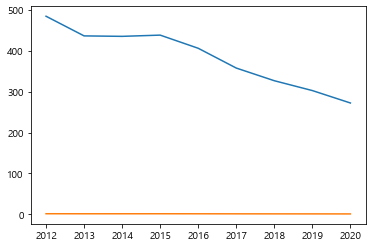

In [27]:
plt.plot(df.index,df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

## 범위가 안맞음

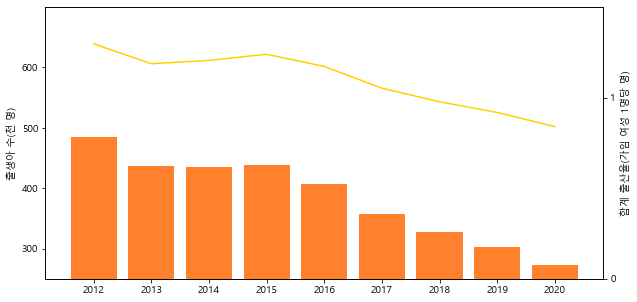

In [38]:
## x축을 공유시키고 다른 y축을 정의해줘야함

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_ylabel('출생아 수(천 명)')
ax1.set_ylim(250,700)
ax1.set_yticks([300,400,500,600])
ax1.bar(df.index, df['출생아 수'],color='#ff812d')

ax2 = ax1.twinx() # x축 공유
ax2.set_ylabel('합계 출산율(가임 여성 1명당 명)')
ax2.set_ylim(0,1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index, df['합계 출산율'],color='#ffd100')


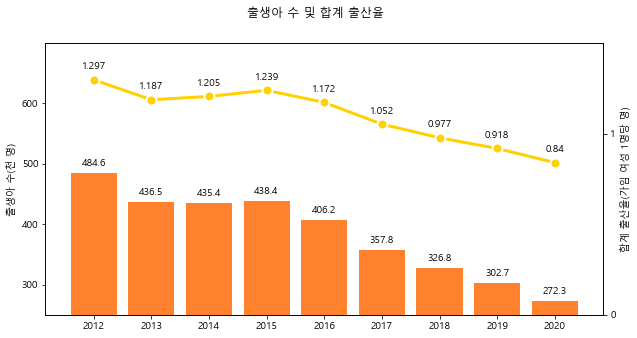

In [60]:
fig, ax1 = plt.subplots(figsize=(10,5))
fig.suptitle("출생아 수 및 합계 출산율")


ax1.set_ylabel('출생아 수(천 명)')
ax1.set_ylim(250,700)
ax1.set_yticks([300,400,500,600])
ax1.bar(df.index, df['출생아 수'],color='#ff812d')
for idx , val in enumerate(df['출생아 수']):
    ax1.text(idx, val+12 ,val , ha='center')



ax2 = ax1.twinx() # x축 공유
ax2.set_ylabel('합계 출산율(가임 여성 1명당 명)')
ax2.set_ylim(0,1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index, df['합계 출산율'],color='#ffd100',marker='o', ms=10 ,mec='w',mew=2, lw =3 )
## ms - marker size / mec - marker edge color / mew - marker edge width / lw = line width
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.06 , val , ha='center')

    
fig.savefig("출생아 수 및 합계 출산율.png",dpi=100)
plt.show()